# Data Challenge 1
This is the first data challenge for the insight data science program. The prompt given to our team of four (Abhilash, Ava, Daniel, and Matt) is provided below:

## Breast Cancer Cell Detection


#### Please limit yourself to 4 hours time!

Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.

Even though this seems like a fairly straightforward task, there are so many ways you can explore, visualize, engineer your features, and tell a story with this data. It will be interesting to see the different approaches people take! Some important questions to think about are: how can you best explore the data? Why did you select your particular model? How did you validate your model? What insights can you derive from your results?

Follow data challenge best practices. Pay particular attention to how you present your findings - communicate your critical thinking, **tell a data story.** Please code and annotate your analysis in a Jupyter notebook. Please place your submission in the submission folder.

### Please push your submissions to the Submissions sub-folder with the naming convention: lname_fname_DC1.

The dataset consists of 699 cells for which you have the following features:

Sample code number: id number  
Clump Thickness: 1 - 10  
Uniformity of Cell Size: 1 - 10  
Uniformity of Cell Shape: 1 - 10  
Marginal Adhesion: 1 - 10  
Single Epithelial Cell Size: 1 - 10  
Bare Nuclei: 1 - 10  
Bland Chromatin: 1 - 10  
Normal Nucleoli: 1 - 10  
Mitoses: 1 - 10  
Class: (2 for benign, 4 for malignant)

The dataset is also available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

# Cancer classification
First we import the raw dataset:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [33]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("breast-cancer-wisconsin.csv", header=None);
df.columns = ['id','clump_thickness',
              'uniformity_size',
              'uniformity_shape',
              'adhesion',
              'single_cell_size',
              'bare_nuclei',
              'chromatin',
              'normal_nuclei',
              'mitoses',
              'malignant']
 
df['malignant'] = (df['malignant']-2)/2
df.head()

,id,clump_thickness,uniformity_size,uniformity_shape,adhesion,single_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


## Data cleaning
The column "bare_nuclei" contains some question marks, which casts the column as strings. We impute these missing values using the median of bare_nuclei (which is 1) and convert the column to numeric.

In [0]:
import numpy as np
bn_med = np.median(df['bare_nuclei'] != '?')
df['bare_nuclei'] = df['bare_nuclei'].replace("?", bn_med)
df['bare_nuclei'] = df['bare_nuclei'].apply(pd.to_numeric)

## Exploratory Data Analysis
We create a pairplot (using Seaborn) to show variable correlations:

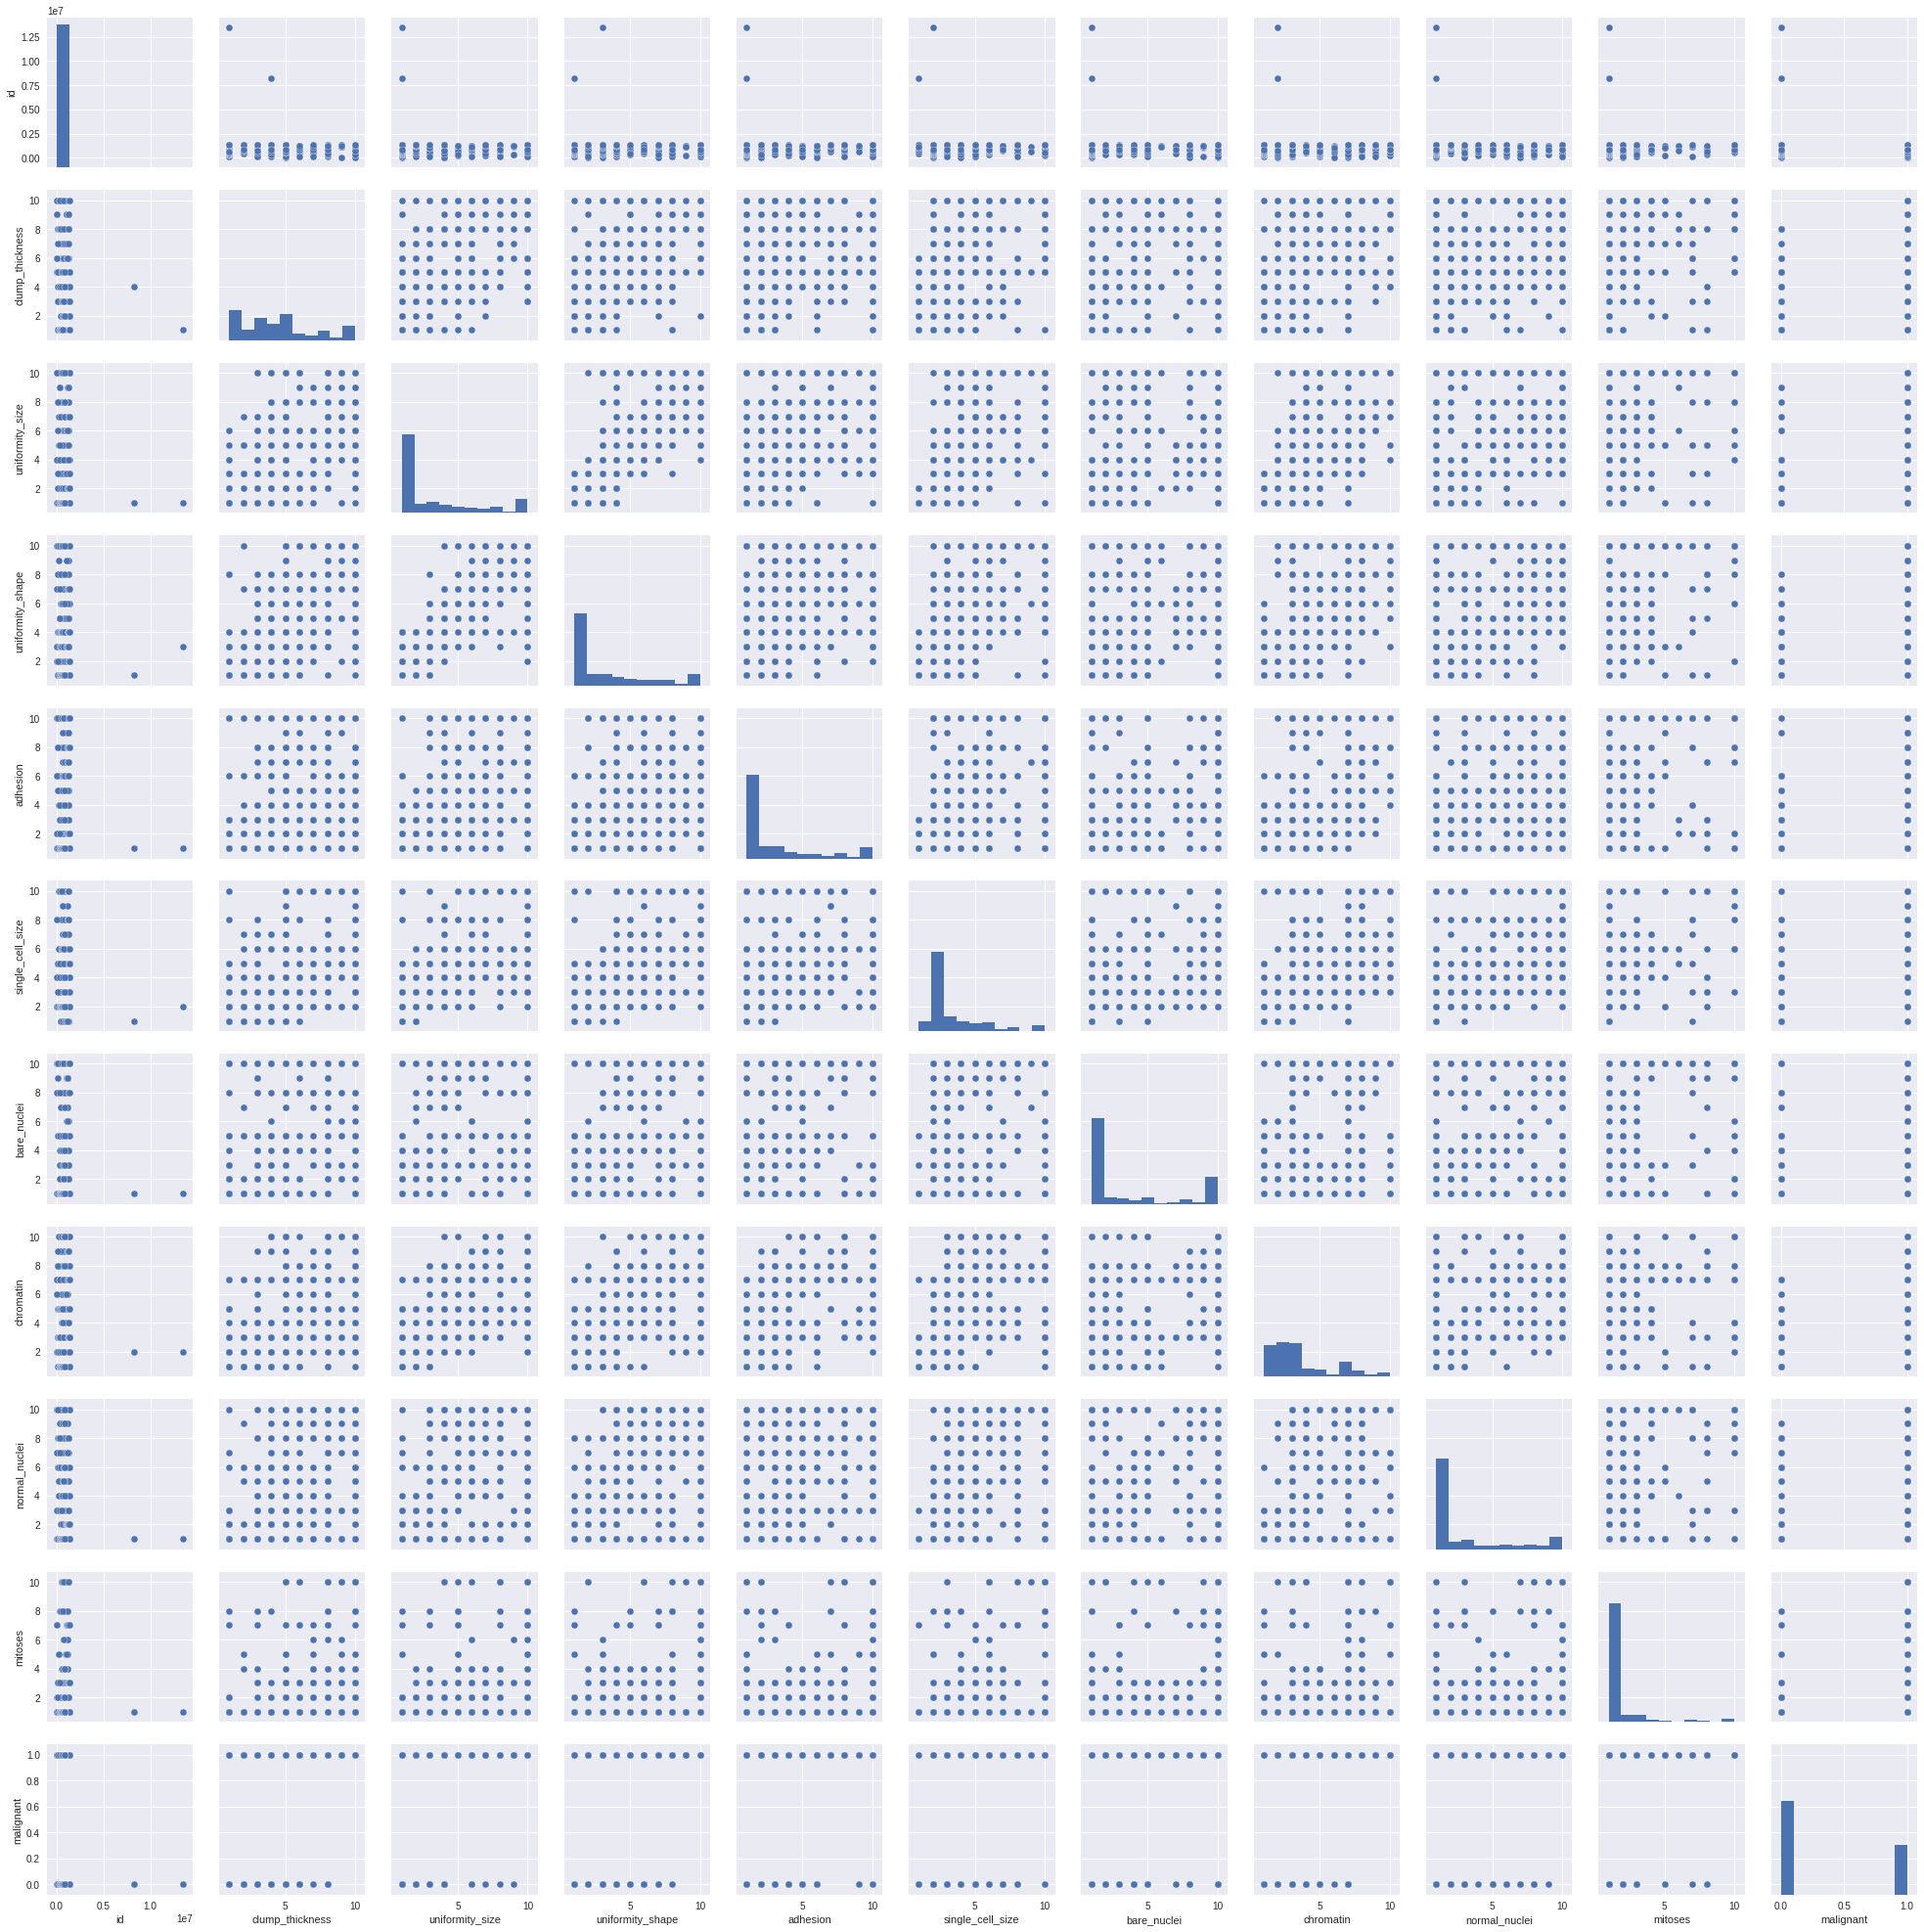

In [49]:
import seaborn as sns

sns.pairplot(df)

Visualizing data is important. Pairplot give us every relationship as well as the histogram for every variable! And it is pretty.

In [19]:
# Missing data exploration
df.isnull().sum(axis=0)
# No missing data woot woot

id                  0
clump_thickness     0
uniformity_size     0
uniformity_shape    0
adhesion            0
single_cell_size    0
bare_nuclei         0
chromatin           0
normal_nuclei       0
mitoses             0
malignant           0
dtype: int64

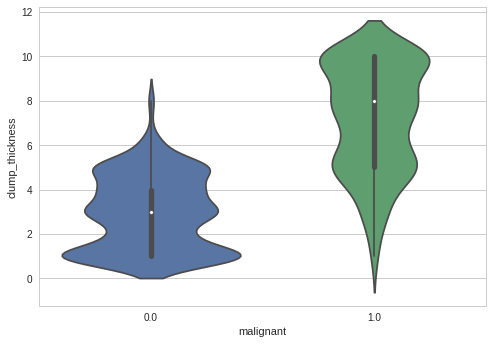

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")
sns.violinplot(x='malignant', y='clump_thickness' , data=df)


## Notes after doing exploratory analysis

1. We see  that there are unbalanced classes, much more non-malignant than malignant. Potentially look at undersampling non-malignant, or bootstrapping malignant class.

2. This is 2-class outcome, so we are thinking of doing a classifier using logistic regression or random forest.

3. There are some features that are highly correlated with one another (eg. shape & size), so perhaps we need feature reduction.

4. This is a life-and-death situation, so we want to minimize the False Negatives in our Confusion Matrix, regardless of how high the False Positives are. (that would just mean patient gets a 2nd opinion and biopsy, vs. undiagnosed cancer and death)

In [51]:
df.corr()

,id,clump_thickness,uniformity_size,uniformity_shape,adhesion,single_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses,malignant
id,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniformity_size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniformity_shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nuclei,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


We carry out a logistic regression on all variables, which shows which of the tumor characteristics significantly affect malignancy.

In [38]:
import statsmodels.api as sm
model = sm.formula.glm("malignant ~ clump_thickness + uniformity_size + uniformity_shape + adhesion + single_cell_size + bare_nuclei + chromatin + normal_nuclei + mitoses", family=sm.families.Binomial(), data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              malignant   No. Observations:                  699
Model:                            GLM   Df Residuals:                      689
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -56.545
Date:                Fri, 19 Oct 2018   Deviance:                       113.09
Time:                        18:28:28   Pearson chi2:                     438.
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.7145      1.074     -9.042      0.000     -11.820      -7.609
clump_thickness      0.5346      0.135      3.964      0.000       0.270       0.799
uniformity_size      0.0113      0.193      0.058      0.953      -0.367       0.390
uniformity_shape     0.3238      0.214      1.514      0.130      -0.095       0.743
adhesion             0.2376      0.117      2.036      0.042       0.009       0.466
single_cell_size     0.0583      0.153      0.382      0.702      -0.241       0.357
bare_nuclei          0.4282      0.091      4.730      0.000       0.251       0.606
chromatin            0.4121      0.157      2.626      0.009       0.105       0.720
normal_nuclei        0.1582      0.104      1.519      0.129      -0.046       0.362
mitoses              0.5358      0.307      1.746      0.081      -0.066       1.138
====================================================================================
"""

Clump thickness is the strongest predictor.

## Classification

In [0]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

We train a Logistic Regression classifier using all variables available. We could drop the ones showing up as non-significant above, but this did not improve the model.

In [0]:
cancer_factors = df.drop(['id', 'malignant'], axis=1)
cancer_factors.head()
malignant = df['malignant'].astype(int)

Test-train split (2/3 train, 1/3 test):

In [0]:
x_train, x_test, y_train, y_test = train_test_split(cancer_factors,malignant,test_size=0.33)

In [42]:
# Train LR classifier
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# Test model accuracy, 5x cross validation
scores = cross_val_score(classifier, x_test, y_test, cv=5)
print(scores.mean())

0.947813752698119


We must take great care to avoid false negatives, hence we set a very strict classification threshold of 0.1.

In [0]:
# Do predictions
y_pred_proba = classifier.predict_proba(x_test)[::,1]
threshold = .1
predictions = (y_pred_proba >= threshold).astype('int')

In [32]:
# report metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95       155
          1       0.84      0.99      0.91        76

avg / total       0.94      0.94      0.94       231



ROC curve for the trained model:

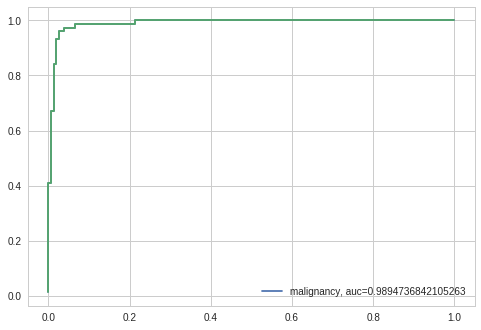

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
#y_pred_proba = classifier.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="malignancy, auc="+str(auc))
plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()

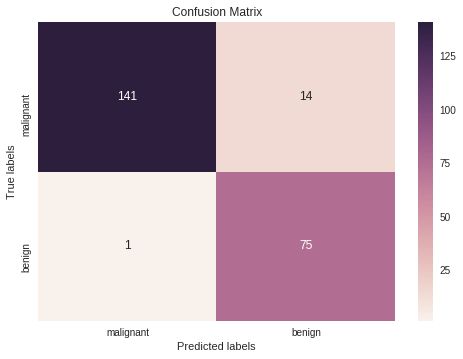

In [39]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['malignant', 'benign']); ax.yaxis.set_ticklabels(['benign', 'malignant']);